<a href="https://colab.research.google.com/github/atmdatascience/python/blob/main/colab/Analisis_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

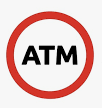

#Procesamiento del Lenguaje Natural - NLP - Nube de Palabras

## Modulos

In [ ]:
import pandas as pd
import numpy as np

## Fuente de datos

In [ ]:
url = "https://raw.githubusercontent.com/atmdatascience/python/main/datasets/encuestasweb/"

In [ ]:
archivo = "Encuestas-2021-Tramite-web.csv"

## Creación del dataframe

In [ ]:
encuesta = pd.read_csv(url+archivo)

## Visualización del dataframe

In [ ]:
encuesta

,Unnamed: 0,Marca temporal,1. Utiliza habitualmente la página web de ATM,2. Le resultó simple la creación de su cuenta en Mis Trámites,3. Le resulta comprensible la sección de Mis Trámites,4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:,5. La información brindada por la página web de ATM es:,6. El boleto para pagar el año 2021 lo obtiene por:,Agregue aquí su sugerencia
0,1,3/02/2021 9:49:57,SI,SI,SI,Muy satisfactoria,Muy Buena,Descarga de la página web de ATM,"La unica sugerencia, es un poco mas de celerid..."
1,2,3/02/2021 9:54:50,SI,SI,SI,Muy satisfactoria,Buena,Descarga de la página web de ATM,NaN
2,3,3/02/2021 10:02:35,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,NaN
3,4,3/02/2021 10:11:57,SI,NO,NO,Nada satisfactoria,Mala,Descarga de la página web de ATM,"Llevo 90 minutos al teléfono y nadie atiende, ..."
4,5,3/02/2021 10:32:10,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,NaN
...,...,...,...,...,...,...,...,...,...
2698,2699,10/06/2021 11:24:36,SI,SI,SI,Muy satisfactoria,Muy Buena,Descarga de la página web de ATM,no tengo sugerencias
2699,2700,10/06/2021 12:48:40,NO,SI,SI,Satisfactoria,Buena,Recepción por correo electrónico,NaN
2700,2701,10/06/2021 12:52:42,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,Debería tener una forma de acceder a Resolucio...
2701,2702,10/06/2021 13:13:35,SI,SI,SI,Satisfactoria,Buena,Descarga de la página web de ATM,NaN


In [ ]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 9 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Unnamed: 0                                                               2703 non-null   int64 
 1   Marca temporal                                                           2703 non-null   object
 2   1. Utiliza habitualmente la página web de ATM                            2703 non-null   object
 3   2. Le resultó simple la creación de su cuenta en Mis Trámites            2703 non-null   object
 4   3. Le resulta comprensible la sección de Mis Trámites                    2703 non-null   object
 5   4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:  2703 non-null   object
 6   5. La información brindada por la página web de ATM es:                  2693 non

## Limpieza y transformación de datos

In [ ]:
encuesta.rename(columns={"Unnamed: 0":"numero"}, inplace=True) # "Unnamed: 0"
encuesta.rename(columns={"Marca temporal":"fecha"}, inplace=True) # "Marca temporal"
encuesta.rename(columns={"1. Utiliza habitualmente la página web de ATM":"P1"}, inplace=True) # "1. Utiliza habitualmente la página web de ATM"
encuesta.rename(columns={"2. Le resultó simple la creación de su cuenta en Mis Trámites":"P2"}, inplace=True) # "2. Le resultó simple la creación de su cuenta en Mis Trámites""
encuesta.rename(columns={"3. Le resulta comprensible la sección de Mis Trámites":"P3"}, inplace=True) # "3. Le resulta comprensible la sección de Mis Trámites"
encuesta.rename(columns={"4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:":"P4"}, inplace=True) # "4. El trámite que realizó dentro de Mis Trámites fue resuelto de forma:"
encuesta.rename(columns={"5. La información brindada por la página web de ATM es:":"P5"}, inplace=True) # "5. La información brindada por la página web de ATM es:"
encuesta.rename(columns={"6. El boleto para pagar el año 2021 lo obtiene por:":"P6"}, inplace=True) # "6. El boleto para pagar el año 2021 lo obtiene por:"
encuesta.rename(columns={"Agregue aquí su sugerencia":"P7"}, inplace=True) # "Agregue aquí su sugerencia"

In [ ]:
encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   numero  2703 non-null   int64 
 1   fecha   2703 non-null   object
 2   P1      2703 non-null   object
 3   P2      2703 non-null   object
 4   P3      2703 non-null   object
 5   P4      2703 non-null   object
 6   P5      2693 non-null   object
 7   P6      2703 non-null   object
 8   P7      951 non-null    object
dtypes: int64(1), object(8)
memory usage: 190.2+ KB


In [ ]:
# encuesta.to_excel("/content/drive/MyDrive/encuesta.xlsx")

## Clonando el dataframe

Vamos a clonar el dataframe para luego dejar solo la columna que nos interesa que es la que contiene las encuestas..

In [ ]:
texto = encuesta.copy(deep=False)

In [ ]:
texto = texto.drop(columns=["numero","fecha","P1","P2","P3","P4","P5","P6"], axis=1)

In [ ]:
texto = texto.dropna(how="any")

In [ ]:
texto = texto.reset_index()
texto

,index,P7
0,0,"La unica sugerencia, es un poco mas de celerid..."
1,3,"Llevo 90 minutos al teléfono y nadie atiende, ..."
2,8,ES IMPOSIBLE COMUNICARSE CON USTEDES Y RESOLVE...
3,15,Nunca atienden en el 148 ni contestan de maner...
4,18,Mejorar tiempos de respuesta de los trámites s...
...,...,...
946,2691,El pago del impuesto inmobiliario no coincide ...
947,2694,Deberían referirse a formularios e informes c...
948,2696,Que se puedan descargar las constancias de ATM...
949,2698,no tengo sugerencias


In [ ]:
texto = texto.drop(columns=["index"], axis=1)
texto

,P7
0,"La unica sugerencia, es un poco mas de celerid..."
1,"Llevo 90 minutos al teléfono y nadie atiende, ..."
2,ES IMPOSIBLE COMUNICARSE CON USTEDES Y RESOLVE...
3,Nunca atienden en el 148 ni contestan de maner...
4,Mejorar tiempos de respuesta de los trámites s...
...,...
946,El pago del impuesto inmobiliario no coincide ...
947,Deberían referirse a formularios e informes c...
948,Que se puedan descargar las constancias de ATM...
949,no tengo sugerencias


## Convirtiendo el texto en minuscula

In [ ]:
texto.P7 = texto.P7.astype(str).str.lower()
texto

,P7
0,"la unica sugerencia, es un poco mas de celerid..."
1,"llevo 90 minutos al teléfono y nadie atiende, ..."
2,es imposible comunicarse con ustedes y resolve...
3,nunca atienden en el 148 ni contestan de maner...
4,mejorar tiempos de respuesta de los trámites s...
...,...
946,el pago del impuesto inmobiliario no coincide ...
947,deberían referirse a formularios e informes c...
948,que se puedan descargar las constancias de atm...
949,no tengo sugerencias


## Eliminando acentos y simbolos de puntuación

In [ ]:
texto.P7 = texto.P7.astype(str).str.replace("á","a")
texto.P7 = texto.P7.astype(str).str.replace("é","e")
texto.P7 = texto.P7.astype(str).str.replace("í","i")
texto.P7 = texto.P7.astype(str).str.replace("ó","o")
texto.P7 = texto.P7.astype(str).str.replace("ú","u")
texto.P7 = texto.P7.astype(str).str.replace("ü","u")
texto.P7 = texto.P7.astype(str).str.replace(",","")
texto.P7 = texto.P7.astype(str).str.replace(";","")
texto.P7 = texto.P7.astype(str).str.replace(":","")
texto

,P7
0,la unica sugerencia es un poco mas de celerida...
1,llevo 90 minutos al telefono y nadie atiende p...
2,es imposible comunicarse con ustedes y resolve...
3,nunca atienden en el 148 ni contestan de maner...
4,mejorar tiempos de respuesta de los tramites s...
...,...
946,el pago del impuesto inmobiliario no coincide ...
947,deberian referirse a formularios e informes c...
948,que se puedan descargar las constancias de atm...
949,no tengo sugerencias


## Activando módulo de Procesamiento de Lenguaje Natural

In [ ]:
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS

[nltk](https://www.nltk.org/)

## Activando módulos gráficos

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

## Obteniendo recursos

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Procesando el Texto

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["la","el","que","de","en","con","una","por","del","para","es","lo","se",
                 "los","me","un","ya","tramites","tramite","las","al","como","mas","pagina","mi","muy"])

text = " ".join(review for review in texto.P7)
wordcloud = WordCloud(stopwords=stopwords, background_color ="white").generate(text)

Una nube de palabras es una visualización de un corpus de texto en el que se representan las veces que las palabras aparecen en el corpus. 



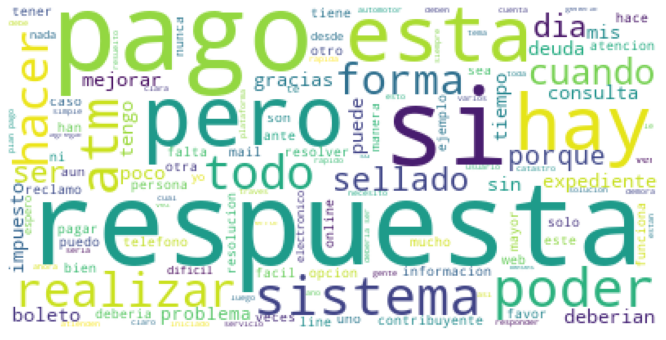

In [ ]:
plt.figure(figsize=(15,6))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()